# importance weights for selection effect
$$p({\bf x}) = \int p({\bf x} | \theta, z) p(\theta, z) d\theta\,dz$$
$$\approx \int p(r | \theta, z) p(\theta, z) d\theta\,dz$$

In this notebook, I'll approximate $p(r | \theta, z)$

$p(M_* | r, z)$

In [1]:
import os
import numpy as np

In [2]:
from provabgs import util as UT
from provabgs import infer as Infer
from provabgs import models as Models

In [12]:
from speclite import filters as specFilter

In [3]:
# -- plotting -- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [5]:
prior = Infer.load_priors([
        Infer.UniformPrior(7., 12.5, label='sed'),
        Infer.FlatDirichletPrior(4, label='sed'),   # flat dirichilet priors
        Infer.UniformPrior(0., 1., label='sed'), # burst fraction
        Infer.UniformPrior(1e-2, 13.27, label='sed'), # tburst
        Infer.LogUniformPrior(4.5e-5, 1.5e-2, label='sed'), # log uniform priors on ZH coeff
        Infer.LogUniformPrior(4.5e-5, 1.5e-2, label='sed'), # log uniform priors on ZH coeff
        Infer.UniformPrior(0., 3., label='sed'),        # uniform priors on dust1
        Infer.UniformPrior(0., 3., label='sed'),        # uniform priors on dust2
        Infer.UniformPrior(-2., 1., label='sed')    # uniform priors on dust_index
    ])

In [6]:
m_nmf = Models.NMF(burst=True, emulator=True)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [14]:
r_pass = specFilter.load_filters('decam2014-r')

In [21]:
theta = m_nmf._parse_theta(_theta)
tage = m_nmf._tage_z_interp(0.24910821)
tt_nmf = np.concatenate([theta['beta1_sfh'], theta['beta2_sfh'],
    theta['beta3_sfh'], theta['beta4_sfh'], theta['gamma1_zh'],
    theta['gamma2_zh'], theta['dust1'], theta['dust2'],
    theta['dust_index'], [tage]])#zred]])

In [20]:
tt_nmf

array([ 5.33681765e-01,  1.49158583e-01,  2.97925690e-01,  1.92339612e-02,
        4.31871866e-04,  1.81849818e-03,  1.93655829e+00,  2.59772850e+00,
       -1.76733119e+00,  1.07714180e+01])

In [26]:
thetas, zs, r_mags = [], [], [] 
for i in range(10000): 
    _theta = prior.transform(prior.sample())
    _z = np.random.uniform(0., 0.6, size=1)
    
    w, f, r_nmgy = m_nmf.sed(_theta, _z[0], filters=r_pass)
    r_mag = 22.5 - 2.5 * np.log10(r_nmgy)
    
    thetas.append(_theta)
    zs.append(_z) 
    r_mags.append(r_mag)

In [29]:
np.array(zs).shape

(10000, 1)

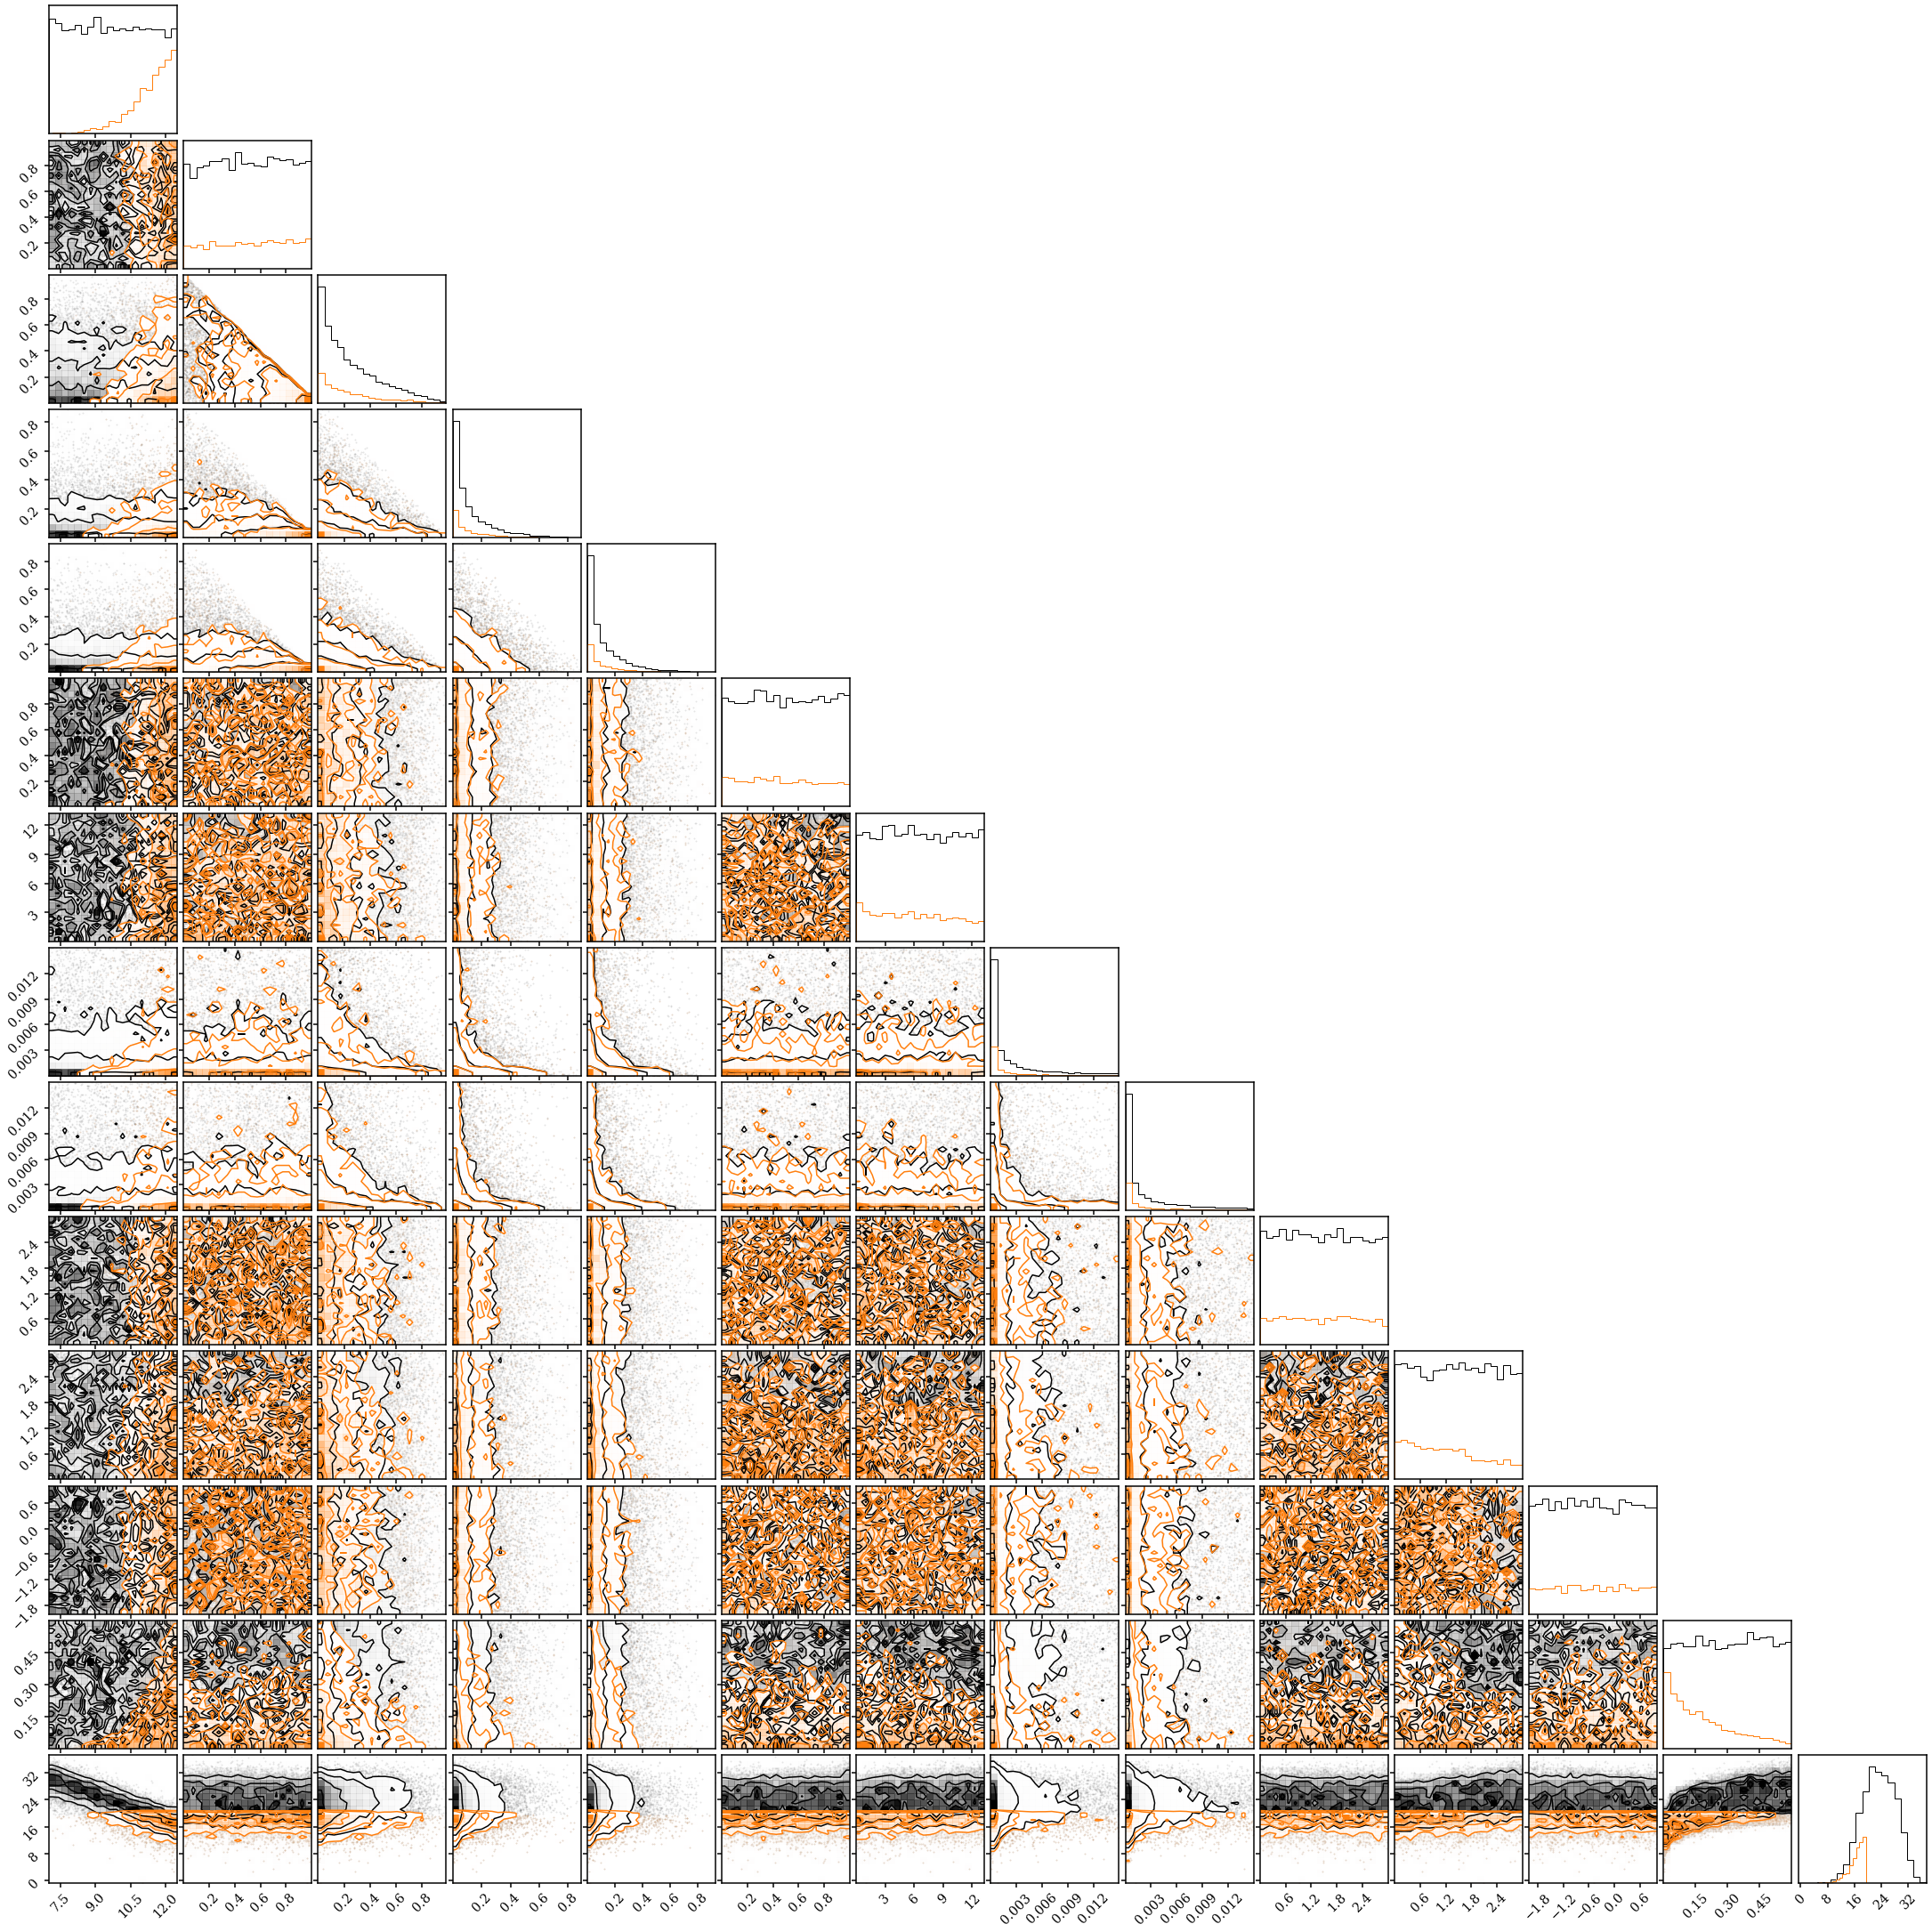

In [37]:
fig = DFM.corner(np.concatenate([np.array(thetas), np.array(zs), np.array(r_mags)], axis=1))
_ = DFM.corner(np.concatenate([np.array(thetas), np.array(zs), np.array(r_mags)], axis=1)[np.array(r_mags).flatten() < 19.5], 
               color='C1', fig=fig)

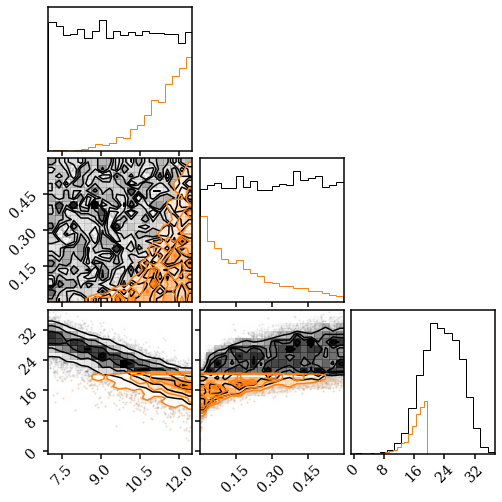

In [38]:
fig = DFM.corner(np.concatenate([np.array(thetas)[:,0][:,None], np.array(zs), np.array(r_mags)], axis=1))
_ = DFM.corner(np.concatenate([np.array(thetas)[:,0][:,None], np.array(zs), np.array(r_mags)], axis=1)[np.array(r_mags).flatten() < 19.5], 
               color='C1', fig=fig)